### MALE FEMALE BIASES CALCULATION


In [1]:
import sys 
sys.path.append('..')

import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words, change_label_to_english_at_association
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

#CHANGE BELOW TWO LINE WITH
from word_sets_european_languages_staford_standards import european_language_word_list
MODEL_DIR = '../../word_embeddings/european_ln_word_vectors/fasttext_aligned/'

### load male, female & professional occupation wordlist

In [2]:
def calculate_distance_class_instance(lang):
    
    PROFESSIONAL_OCCUPATIONS = european_language_word_list[lang]['pr_occupations']
    PROFESSIONAL_OCCUPATIONS_ENGLISH = european_language_word_list['en']['pr_occupations']
    MALE_WORDS = european_language_word_list[lang]['male_words']
    FEMALE_WORDS = european_language_word_list[lang]['female_words']
    
    PROFESSIONAL_OCCUPATIONS = [word.strip() for word in PROFESSIONAL_OCCUPATIONS]
    MALE_WORDS = [word.strip() for word in MALE_WORDS]
    FEMALE_WORDS = [word.strip() for word in FEMALE_WORDS]
    
    target_groups = [PROFESSIONAL_OCCUPATIONS]
    target_group_labels = ['professional_occupation']

    reference_groups = [MALE_WORDS, FEMALE_WORDS]
    reference_group_labels = ['male', 'female']
    
    
    print('target group -->')
    for group, labels in zip(target_groups, target_group_labels):
        print(labels, group)
        print('\n')
    
    print('\n')

    print('reference group -->')
    for group, labels in zip(reference_groups, reference_group_labels):
        print(labels, group)
        print('\n')
    
    
    
    calculate_association_distance = CalculateDistance()
    calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
    calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)
    
    b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH)
    
    return calculate_association_distance, b2e_dict

### Calculate associations

target group -->
professional_occupation ['Hausmeister', 'Statistiker', 'Hebamme', 'Gerichtsvollzieher', 'Auktionator', 'Fotograf', 'Geologe', 'Schuhmacher', 'Athlet', 'Kassierer', 'Tänzer', 'Haushälterin', 'Buchhalter', 'Physiker', 'Gärtner', 'Zahnarzt', 'Weber', 'Schmied', 'Psychologe', 'Vorgesetzter', 'Mathematiker', 'Vermesser', 'Schneider', 'Designer', 'Ökonom', 'Mechaniker', 'Arbeiter', 'Postmeister', 'Makler', 'Chemiker', 'Bibliothekar', 'Begleiter', 'Büroangestellter', 'Musiker', 'Portier', 'Wissenschaftler', 'Zimmermann', 'Seemann', 'Ausbilder', 'Sheriff', 'Pilot', 'Inspektor', 'Maurer', 'Bäcker', 'Administrator', 'Architekt', 'Sammler', 'Bediener', 'Chirurg', 'Fahrer', 'Maler', 'Dirigent', 'Krankenschwester', 'Koch', 'Ingenieur', 'Rentner', 'Verkäufer', 'Anwalt', 'Geistlicher', 'Arzt', 'Bauer', 'Angestellter', 'Manager', 'Wache', 'Künstler', 'Schmied', 'Beamter', 'Polizei', 'Arzt', 'Professor', 'Student', 'Richter', 'Lehrer', 'Autor', 'Sekretär', 'Soldat']




reference group

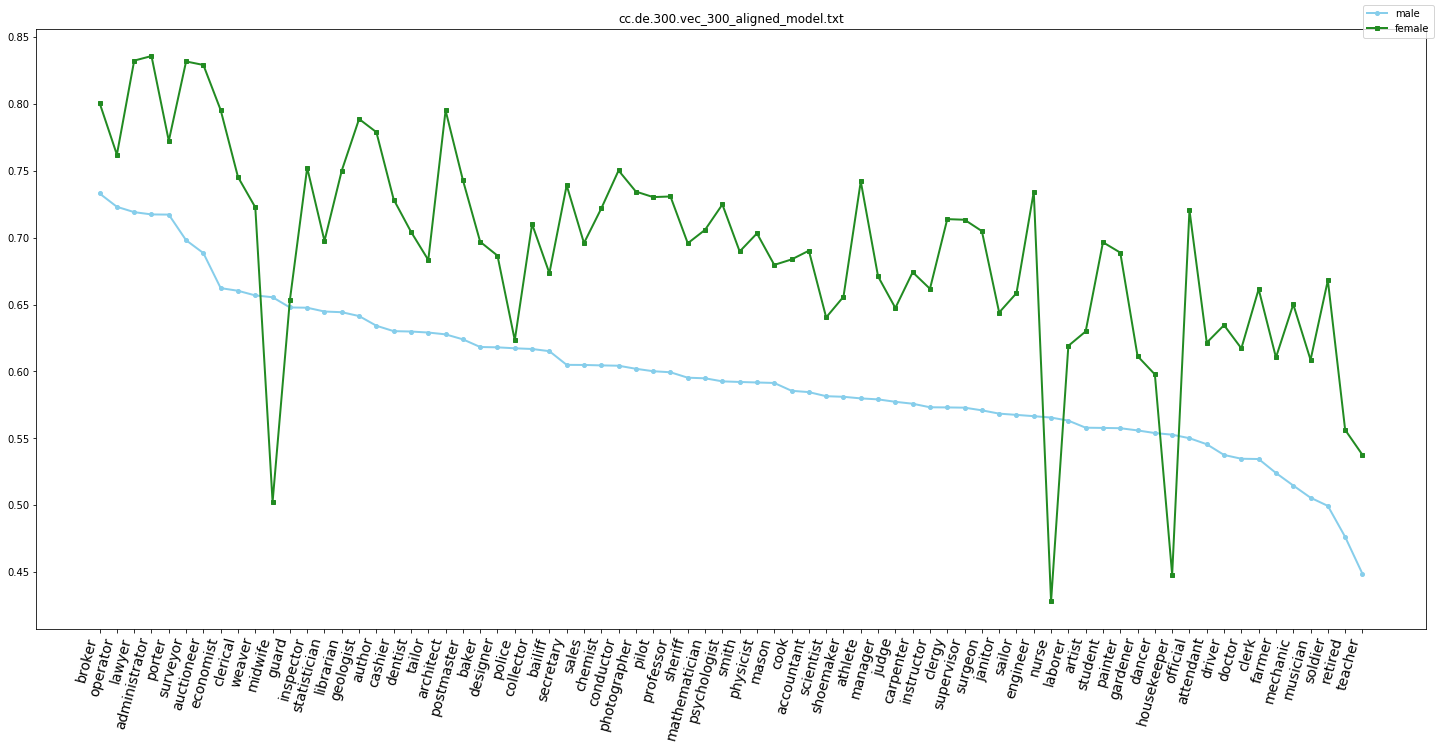

total 0 missing words for this embedding set()



target group -->
professional_occupation ['janitor', 'statistician', 'midwife', 'bailiff', 'auctioneer', 'photographer', 'geologist', 'shoemaker', 'athlete', 'cashier', 'dancer', 'housekeeper', 'accountant', 'physicist', 'gardener', 'dentist', 'weaver', 'blacksmith', 'psychologist', 'supervisor', 'mathematician', 'surveyor', 'tailor', 'designer', 'economist', 'mechanic', 'laborer', 'postmaster', 'broker', 'chemist', 'librarian', 'attendant', 'clerical', 'musician', 'porter', 'scientist', 'carpenter', 'sailor', 'instructor', 'sheriff', 'pilot', 'inspector', 'mason', 'baker', 'administrator', 'architect', 'collector', 'operator', 'surgeon', 'driver', 'painter', 'conductor', 'nurse', 'cook', 'engineer', 'retired', 'sales', 'lawyer', 'clergy', 'physician', 'farmer', 'clerk', 'manager', 'guard', 'artist', 'smith', 'official', 'police', 'doctor', 'professor', 'student', 'judge', 'teacher', 'author', 'secretary', 'soldier']




reference group

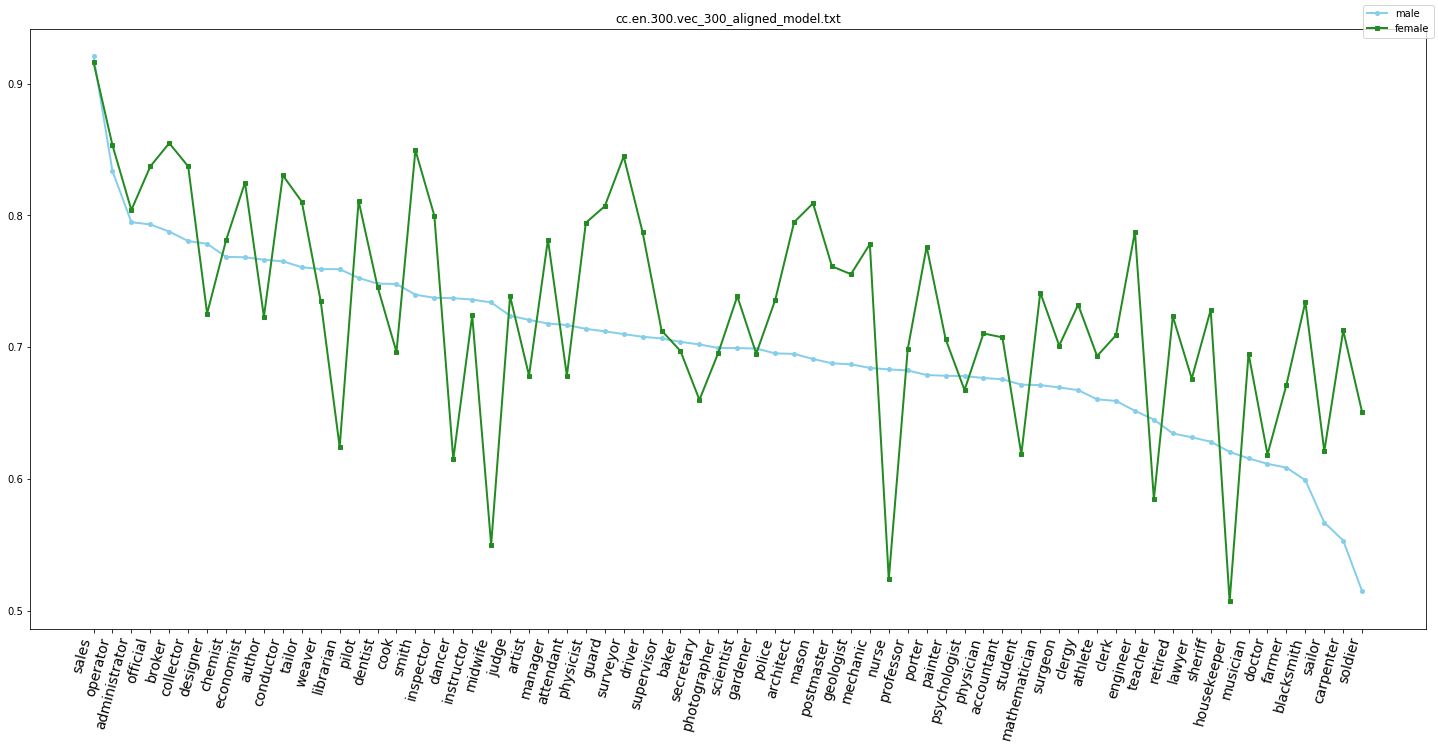

total 11 missing words for this embedding {'nieces', 'nephews', 'laborer', 'auctioneer', 'shoemaker', 'janitor', 'cashier', 'bailiff', 'femen', 'statistician', 'clerical'}



target group -->
professional_occupation ['conserje', 'estadístico', 'comadrona', 'Ballif', 'subastador', 'fotógrafo', 'geólogo', 'zapatero', 'atleta', 'cajero', 'bailarín', 'ama de casa', 'contador', 'físico', 'jardinero', 'dentista', 'tejedor', 'herrero', 'psicólogo', 'supervisor', 'matemático', 'agrimensor', 'sastre', 'diseñador', 'economista', 'mecánico', 'trabajador', 'estafetero', 'corredor', 'químico', 'bibliotecario', 'asistente', 'clerical', 'músico', 'portero', 'científico', 'carpintero', 'marinero', 'instructor', 'sheriff', 'piloto', 'inspector', 'albañil', 'panadero', 'administrador', 'arquitecto', 'coleccionista', 'operador', 'cirujano', 'conductor', 'pintor', 'conductor', 'enfermero', 'cocinero', 'ingeniero', 'retirado', 'ventas', 'abogado', 'clero', 'médico', 'agricultor', 'empleado', 'gerente', 'gu

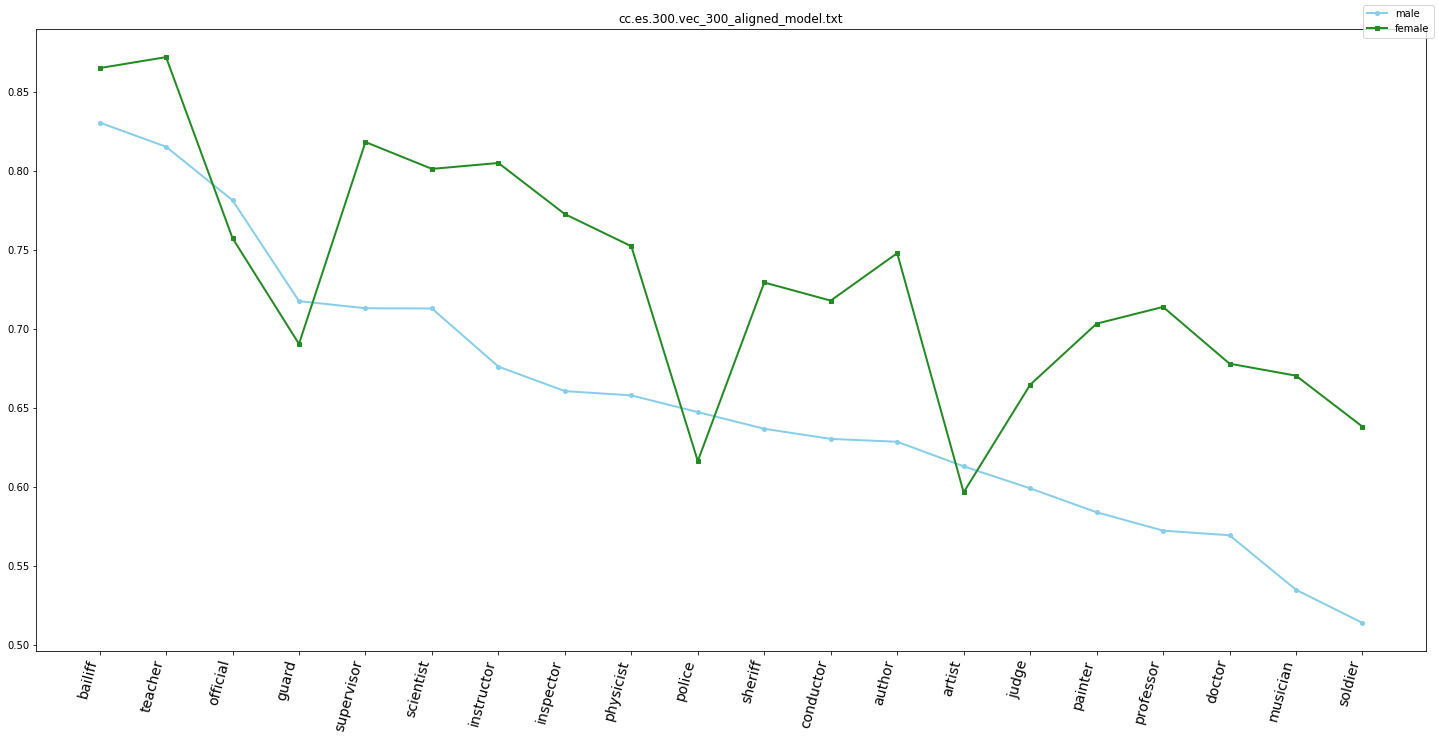

total 66 missing words for this embedding {'matemático', 'sobrina', 'él mismo', 'estadístico', 'piloto', 'enfermero', 'ingeniero', 'estudiante', 'herrero', 'jardinero', 'administrador', 'retirado', 'clero', 'geólogo', 'sastre', 'sobrino', 'tías', 'coleccionista', 'químico', 'trabajador', 'corredor', 'contador', 'zapatero', 'ella misma', 'cajero', 'femen', 'comadrona', 'conserje', 'sobrinos', 'psicólogo', 'clerical', 'panadero', 'mecánico', 'asistente', 'portero', 'albañil', 'carpintero', 'cocinero', 'atleta', 'estafetero', 'arquitecto', 'agrimensor', 'gerente', 'dentista', 'fotógrafo', 'operador', 'diseñador', 'agricultor', 'secretario', 'tejedor', 'tía', 'cirujano', 'abogado', 'bailarín', 'marinero', 'economista', 'sobrinas', 'empleado', 'hermanas', 'hijas', 'subastador', 'ama de casa', 'madres', 'ventas', 'bibliotecario', 'tíos'}



target group -->
professional_occupation ['concierge', 'statisticien', 'sage-femme', 'huissier', 'commissaire-priseur', 'photographe', 'géologue', 'cordo

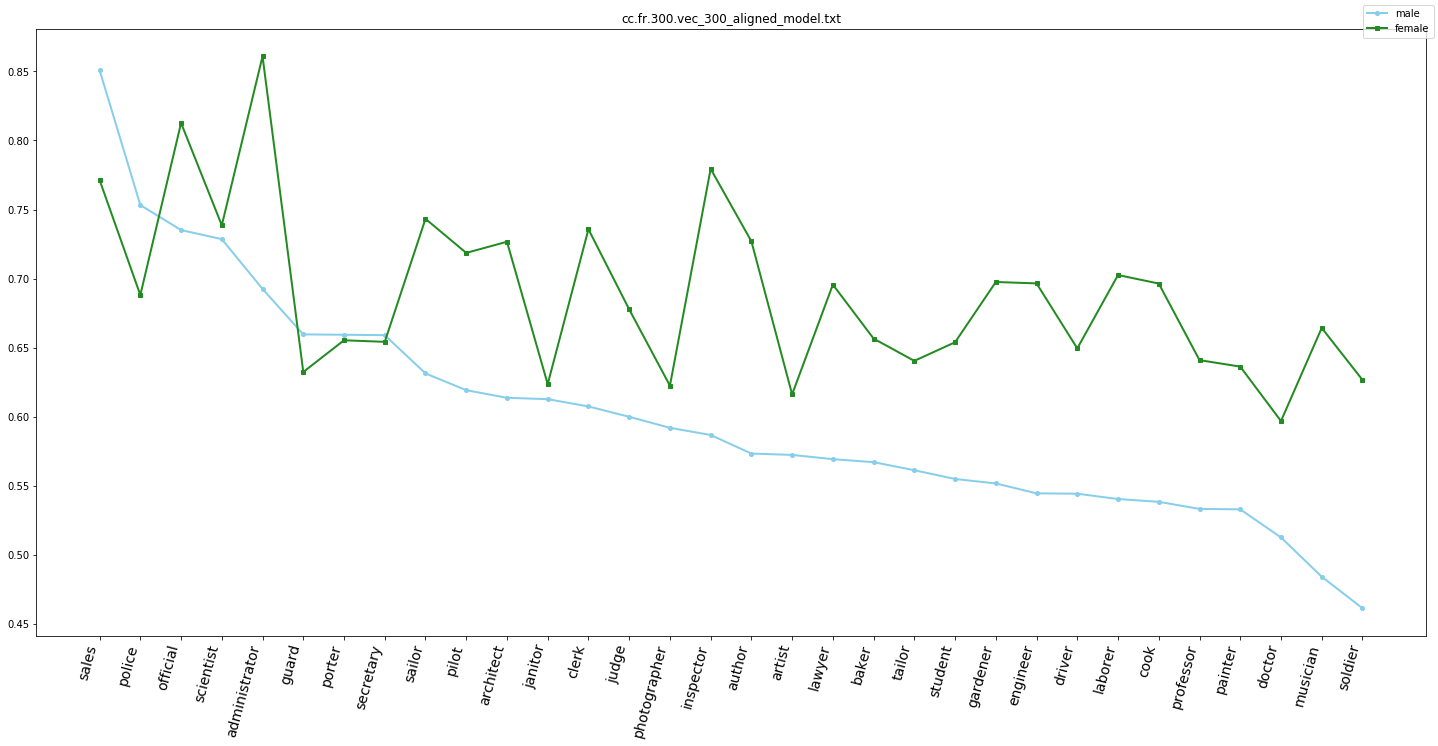

total 50 missing words for this embedding {'chirurgien', 'concepteur', 'opérateur', 'cordonnier', 'conducteur', 'arpenteur', 'dentiste', 'statisticien', 'préposé', 'fonctionnaire', 'instructeur', 'caissier', 'retraité', 'psychologue', 'nièces', 'athlète', 'comptable', 'neveux', 'oncles', 'maître de poste', 'chimiste', 'agriculteur', 'enseignant', 'physicien', 'femen', 'économiste', 'tantes', 'sœurs', 'charpentier', 'forgeron', 'servante', 'infirmier', 'shérif', 'mécanicien', 'maçon', 'bibliothécaire', 'commissaire-priseur', 'tisserand', 'superviseur', 'danseur', 'sage-femme', 'gestionnaire', 'clergé', 'géologue', 'collectionneur', 'huissier', 'nièce', 'courtier', 'mathématicien', 'sienne'}



target group -->
professional_occupation ['bidello', 'statistico', 'ostetrica', 'amministratore', 'banditore', 'fotografo', 'geologo', 'calzolaio', 'atleta', 'cassiere', 'ballerino', 'governante', 'contabile', 'fisico', 'giardiniere', 'dentista', 'tessitore', 'fabbro', 'psicologo', 'supervisore', 

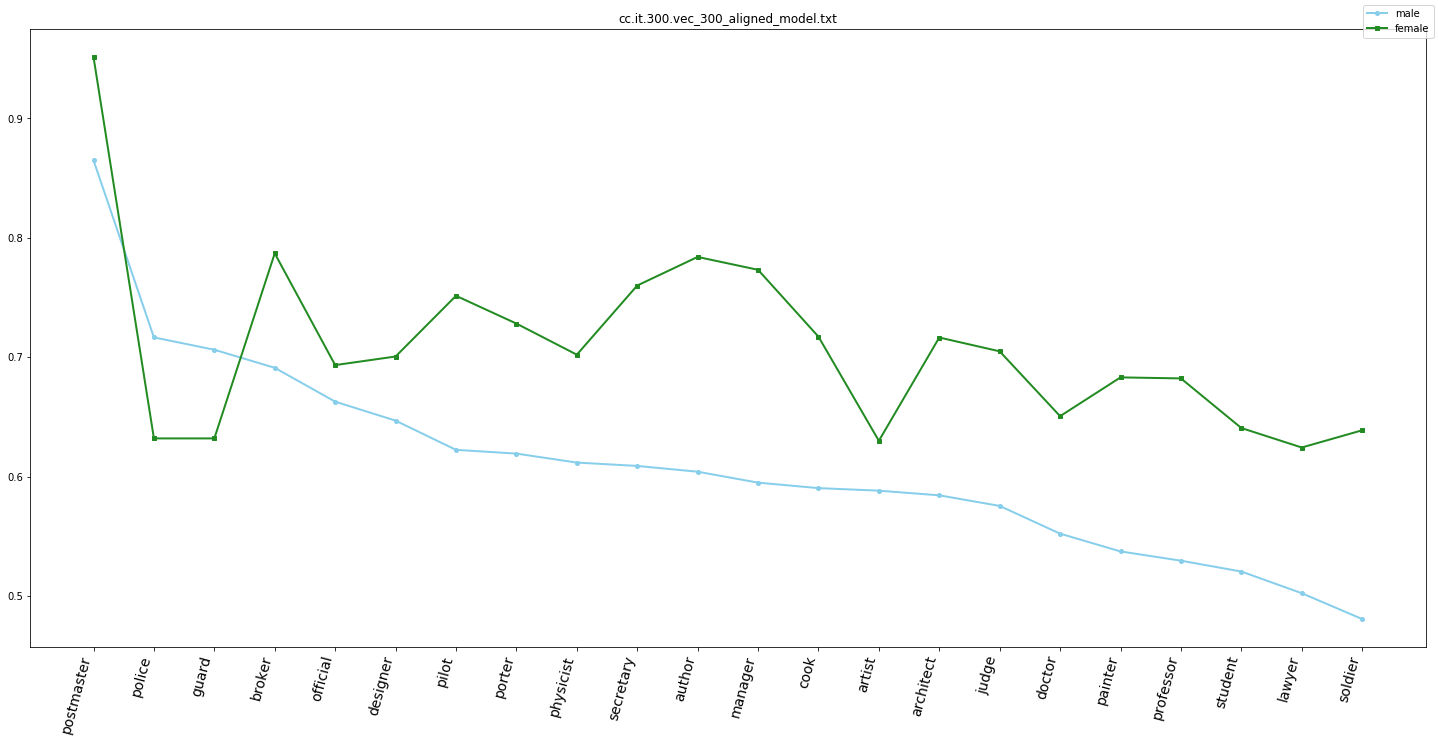

total 60 missing words for this embedding {'ingegnere', 'figlie', 'meccanico', 'psicologo', 'nipote', 'collezionista', 'clero', 'statistico', 'bidello', 'supervisore', 'autista', 'geologo', 'governante', 'chimico', 'pensionato', 'istruttore', 'calzolaio', 'maschi', 'operaio', 'ispettore', 'fabbro', 'matematico', 'infermiere', 'sceriffo', 'marinaio', 'ostetrica', 'chirurgo', 'clericale', 'femen', 'amministratore', 'fornaio', 'muratore', 'carpentiere', 'nipoti', 'musicista', 'atleta', 'madri', 'ballerino', 'dentista', 'assistente', 'operatore', 'giardiniere', 'zii', 'impiegato', 'fotografo', 'banditore', 'insegnante', 'padri', 'vendite', 'sarto', 'economista', 'scienziato', 'cassiere', 'maschio', 'tessitore', 'agricoltore', 'se stesso', 'bibliotecario', 'geometra', 'contabile'}



target group -->
professional_occupation ['уборщик', 'статистика', 'акушерка', 'бейлиф', 'аукционист', 'фотограф', 'геолог', 'сапожник', 'спортсмен', 'кассир', 'танцор', 'экономка', 'бухгалтер', 'физик', 'садов

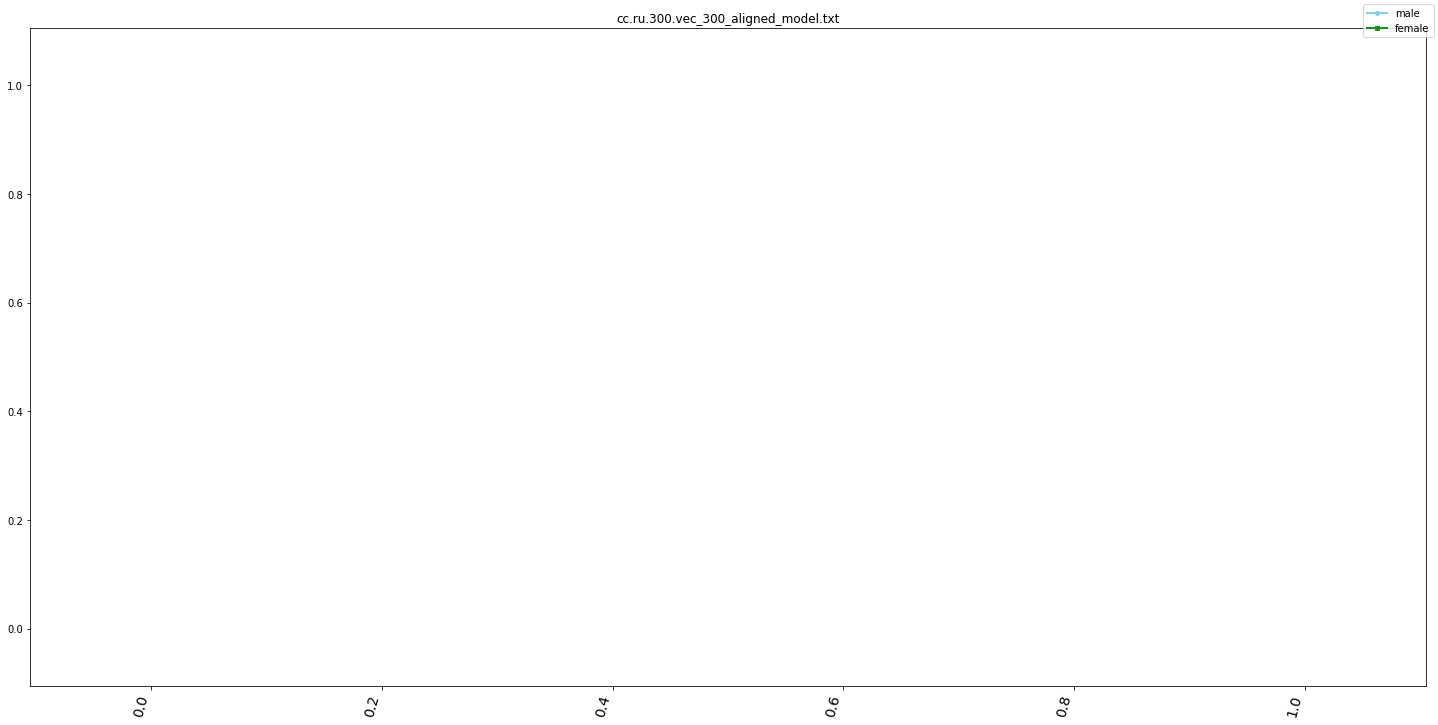

total 103 missing words for this embedding {'дядя', 'отец', 'женщина', 'медсестра', 'женщины', 'мальчик', 'племянницы', 'повар', 'моряк', 'мужчина', 'девушка', 'ткач', 'брат', 'дочь', 'дочери', 'сестра', 'мужчины', 'психолог', 'шериф', 'мальчики', 'секретарь', 'экономка', 'бухгалтер', 'пилот', 'администратор', 'библиотекарь', 'коллекционер', 'кузнец', 'сестры', 'тети', 'тетя', 'спортсмен', 'акушерка', 'мать', 'племянники', 'архитектор', 'сапожник', 'супервайзер', 'математик', 'садовник', 'портер', 'инструктор', 'фотограф', 'чиновник', 'братья', 'плотник', 'танцор', 'полиция', 'инспектор', 'юрист', 'доктор', 'отцы', 'племянница', 'бейлиф', 'отставной', 'механик', 'судья', 'сам', 'служитель', 'солдат', 'почтмейстер', 'каменщик', 'музыкант', 'аукционист', 'дизайнер', 'сама', 'художник', 'профессор', 'матери', 'врач', 'сын', 'экономист', 'хирург', 'брокер', 'физик', 'ученый', 'дяди', 'канцелярский', 'уборщик', 'геолог', 'студент', 'учитель', 'рабочий', 'статистика', 'инженер', 'автор', 'сы

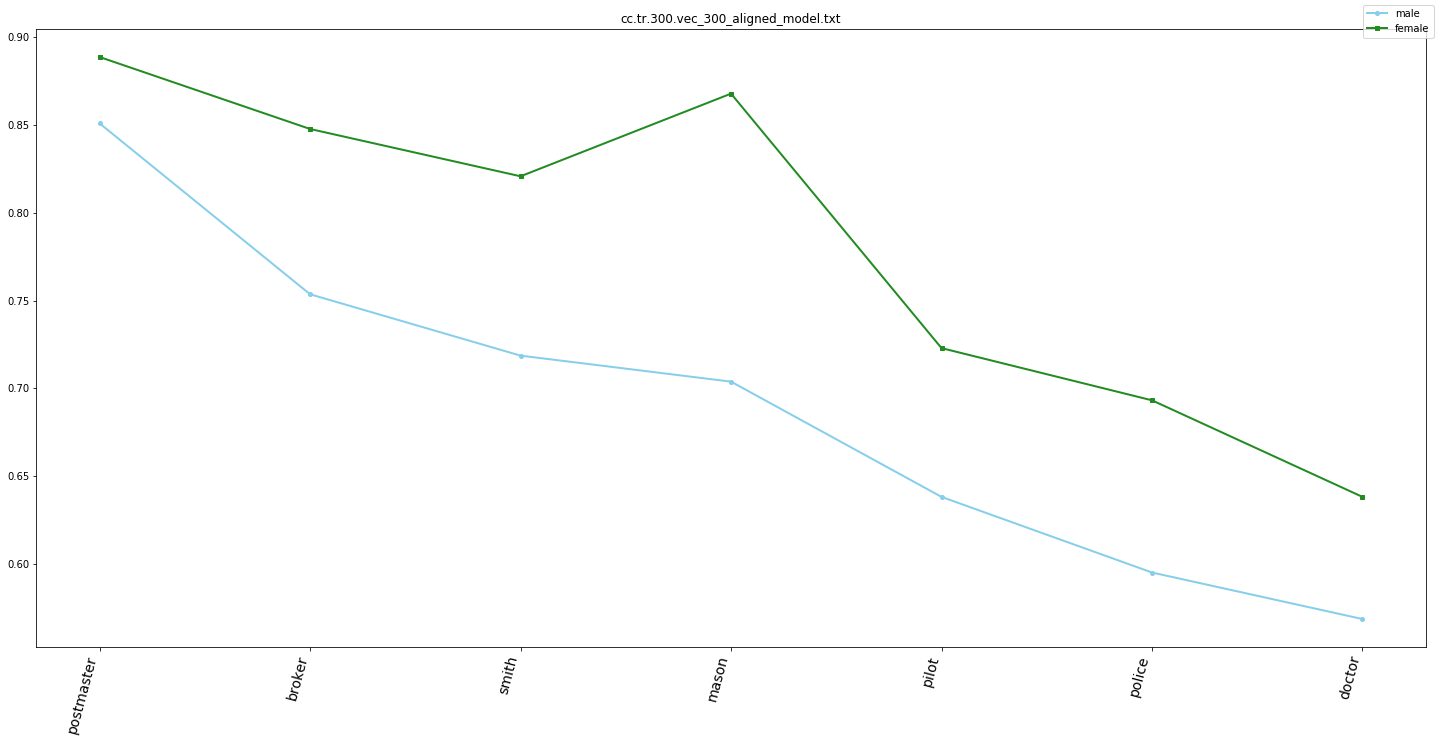

total 93 missing words for this embedding {'öğrenci', 'anneler', 'aşçı', 'sanatçı', 'operatör', 'satış', 'istatistikçi', 'demirci', 'müzisyen', 'psikolog', 'matematikçi', 'yargıç', 'erkek', 'onun', 'kızı', 'ekonomist', 'yönetici', 'görevli', 'eğitmen', 'kız', 'yeğenler', 'dişçi', 'mimar', 'işçi', 'marangoz', 'dokumacı', 'denizci', 'tasarımcı', 'emekli', 'ressam', 'jeolog', 'ebe', 'bilgin', 'çiftçi', 'profesör', 'oğlan', 'müzayede', 'mühendis', 'hizmetçi', 'oğul', 'fotoğrafçı', 'babalar', 'kunduracı', 'dansçı', 'katip', 'oğullar', 'KADIN', 'yazar', 'kendini', 'teyzeler', 'müfettiş', 'resmi', 'fırıncı', 'terzi', 'kütüphaneci', 'femen', 'cerrah', 'birader', 'kendisi', 'bahçıvan', 'kadın', 'mekanik', 'bekçi', 'asker', 'kızları', 'amca', 'kardeşler', 'danışman', 'amcalar', 'avukat', 'muhasebeci', 'yeğen', 'şerif', 'kızlar', 'papaz', 'kimyacı', 'teyze', 'erkekler', 'sörveyör', 'kılavuz', 'mübaşir', 'kasiyer', 'büro', 'fizikçi', 'atlet', 'hademe', 'hemşire', 'sürücü', 'toplayıcı', 'kızkardeş'

In [3]:
association_dict = {}
model_dir = MODEL_DIR
filenames = glob.glob(model_dir + '*txt')
# print(filenames)
for filename in filenames:
    embedding_name = filename.split('/')[-1]
    lang_name = embedding_name.split('.')[1]
    calculate_association_distance, b2e_dict = calculate_distance_class_instance(lang_name)
    target_wise_association_for_this_paper = {}
    if embedding_name.split('.')[-1] == 'bin':
        model = KeyedVectors.load_word2vec_format(filename, binary=True)
    else:
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_embedding, missing_words = calculate_association_distance.get_association_for_provided_embedding(model=model)
    
    
    
    target_wise_association_for_this_embedding = change_label_to_english_at_association(target_wise_association_for_this_embedding, b2e_dict)
    association_dict[embedding_name] = target_wise_association_for_this_embedding
    
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_embedding, b2e_dict = b2e_dict, title= embedding_name)
    
    print('total {} missing words for this embedding {}'.format(len(missing_words), missing_words))
    print('\n' * 2)


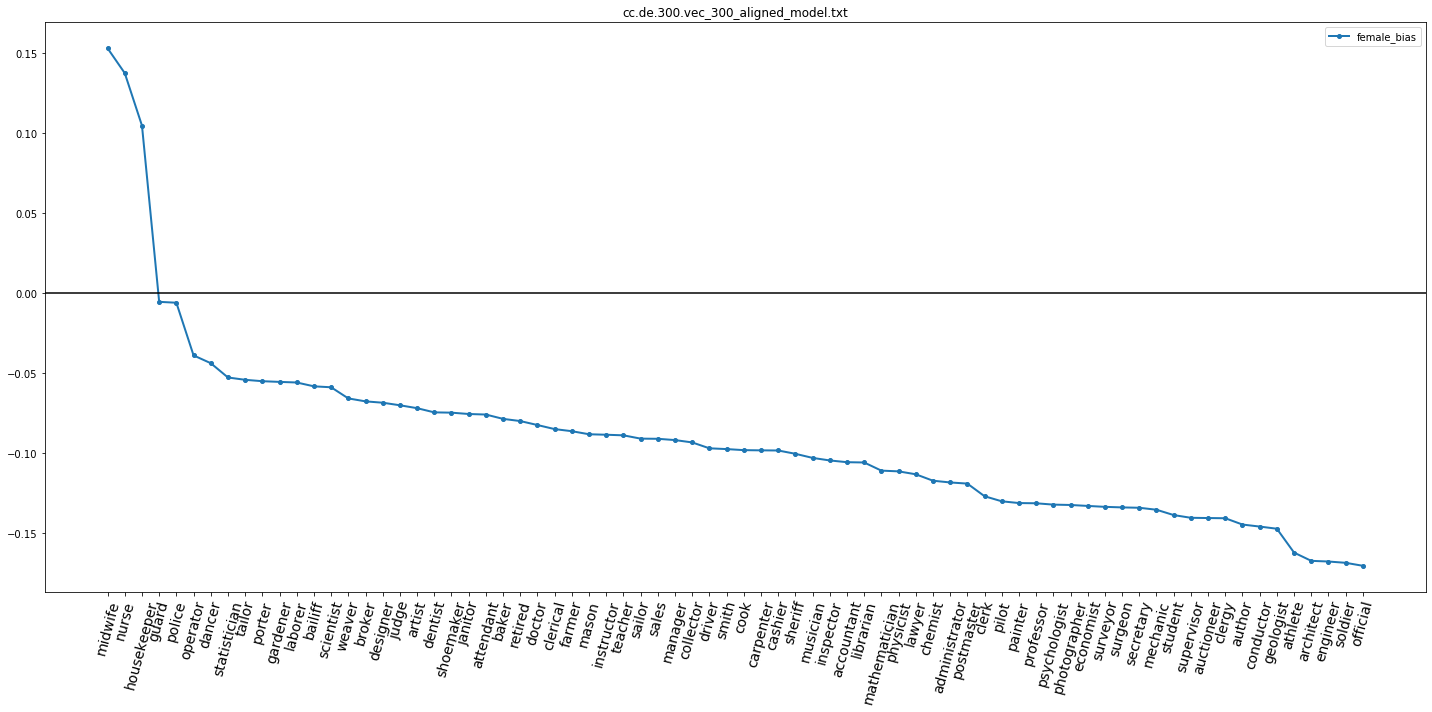

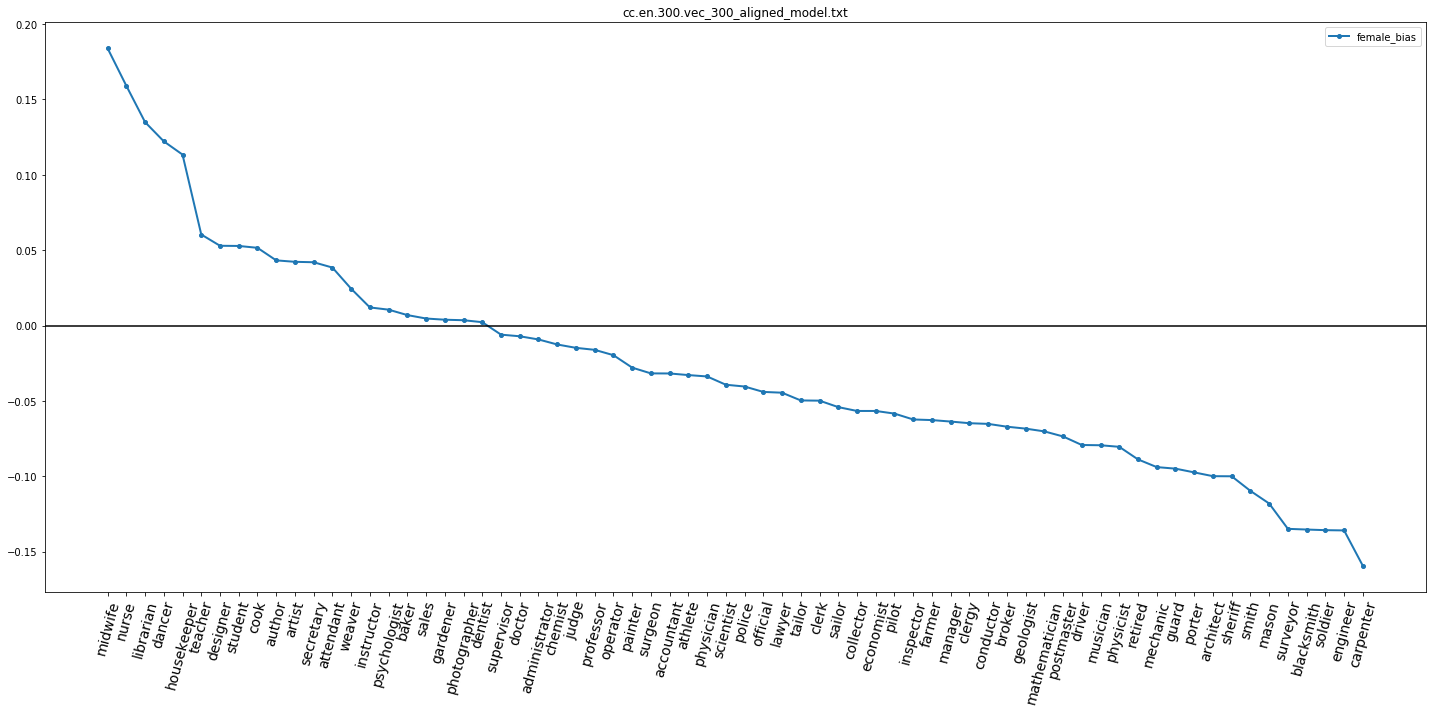

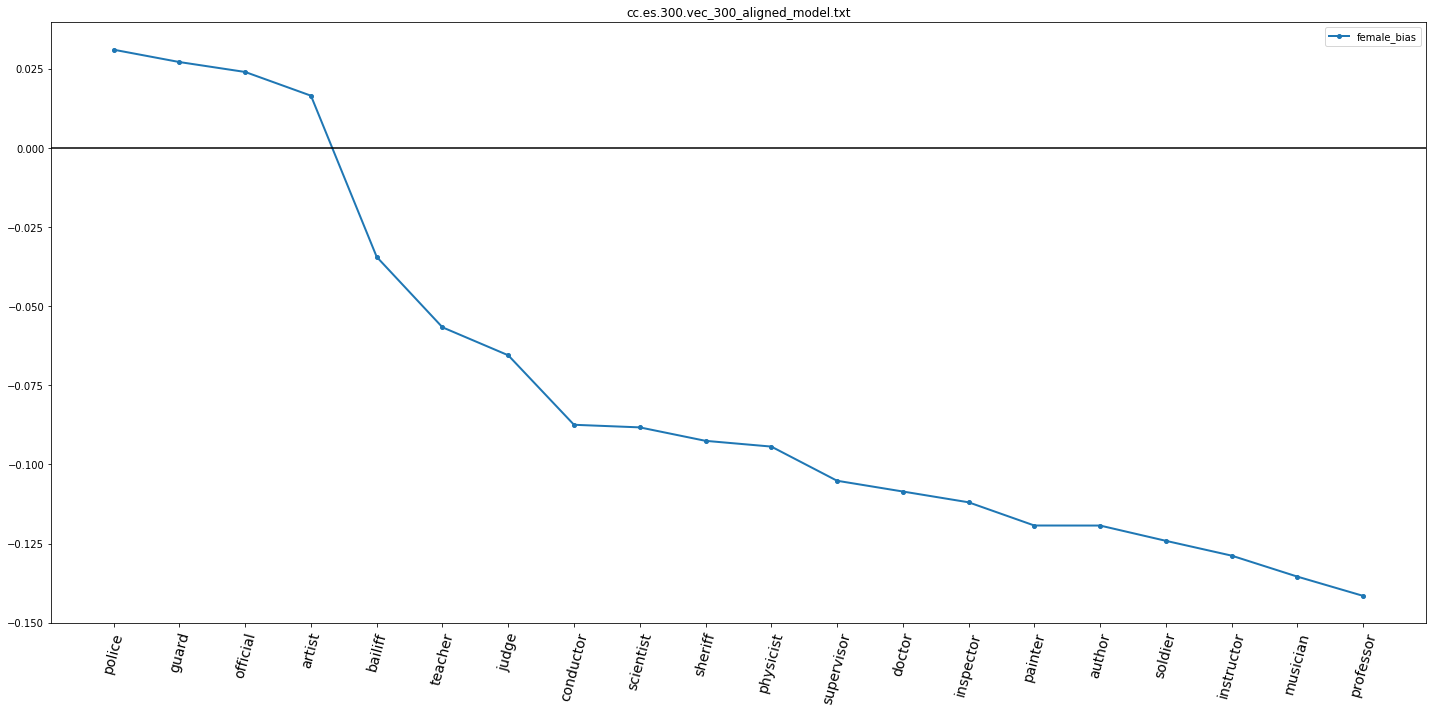

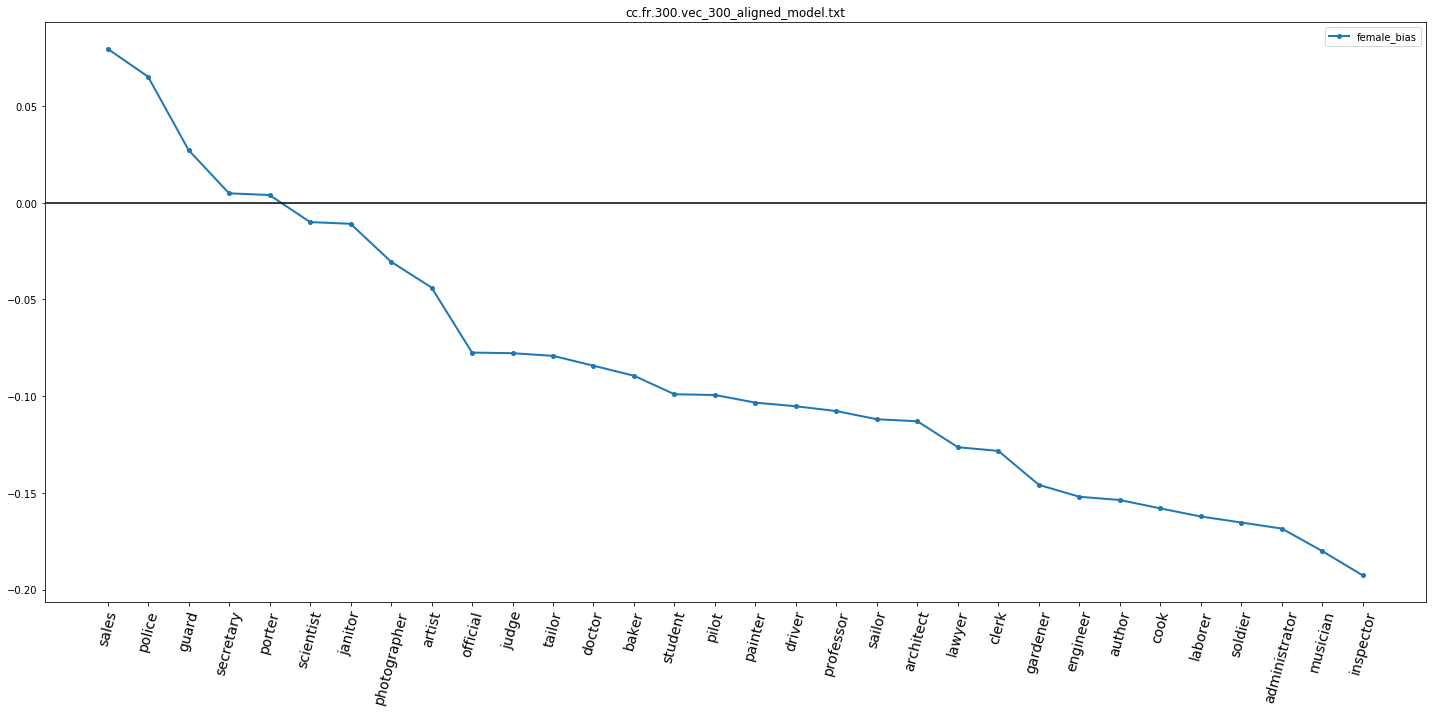

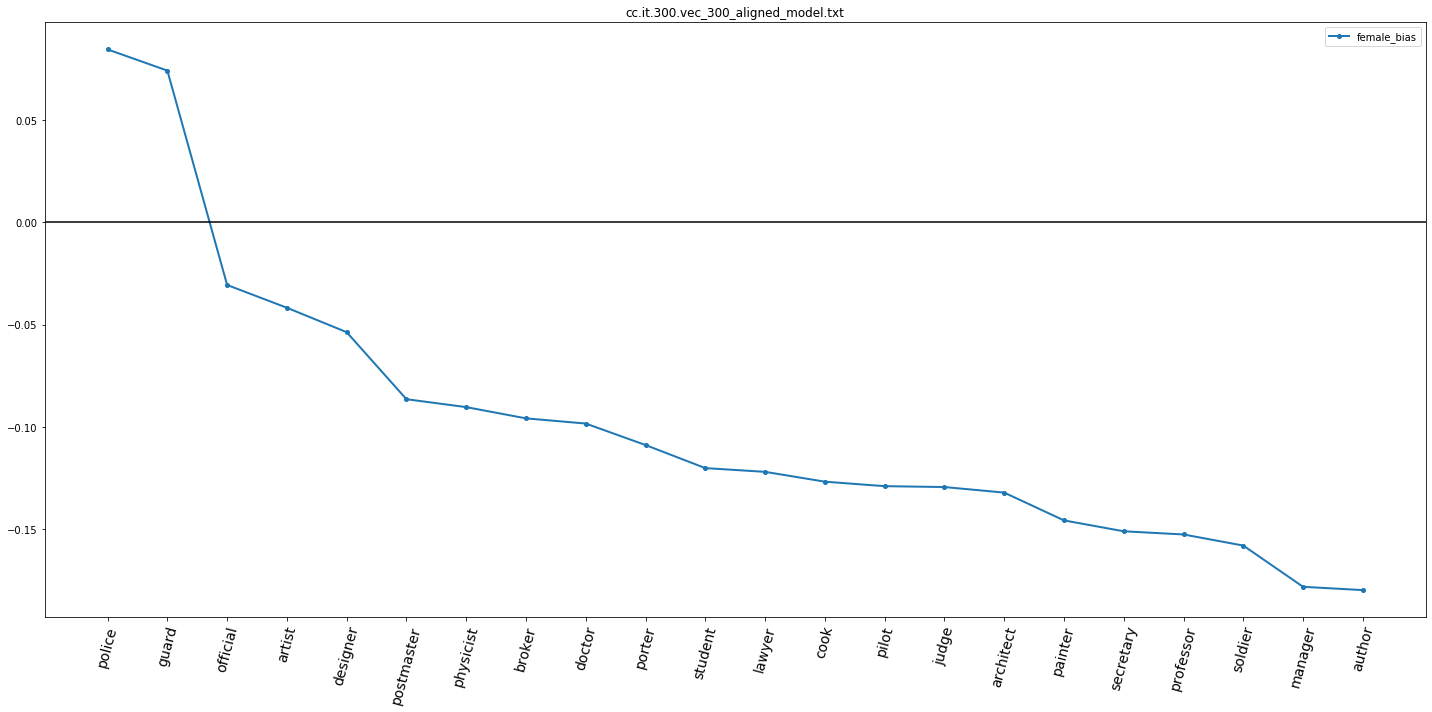

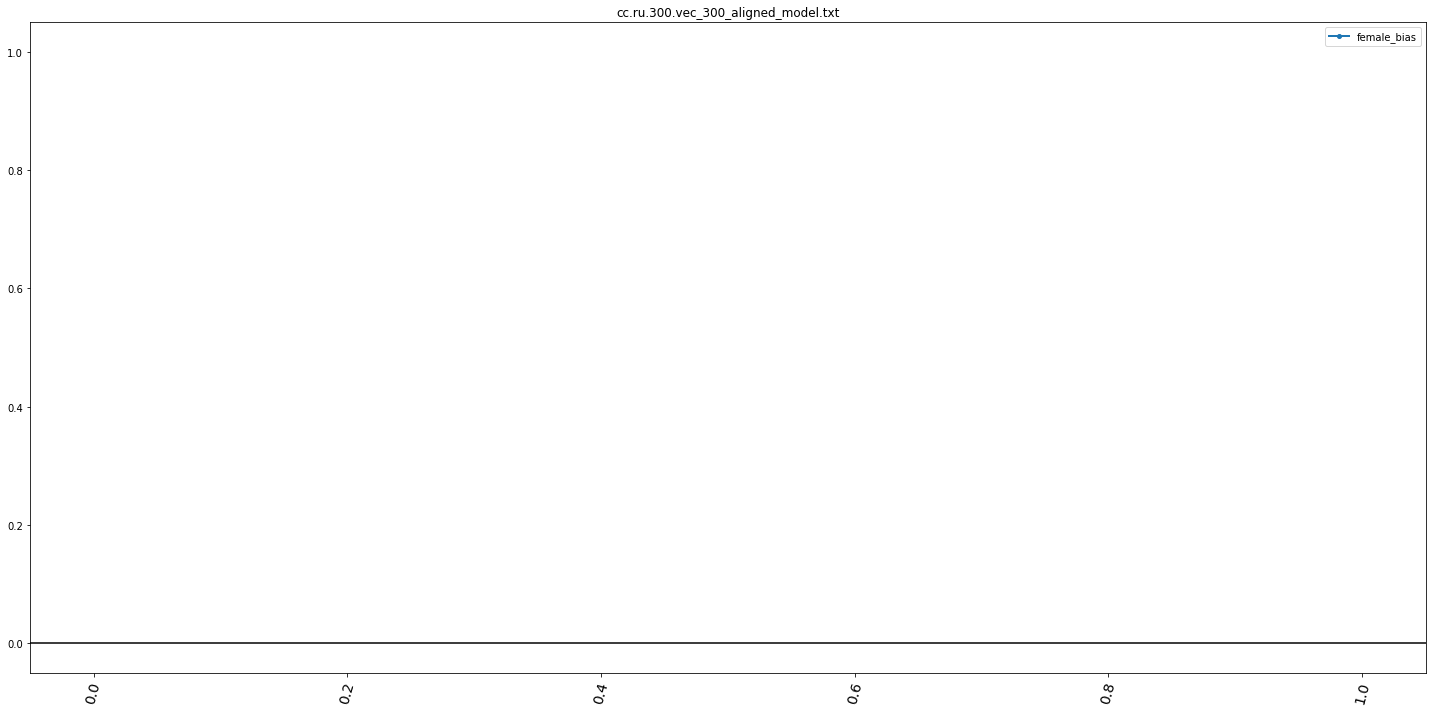

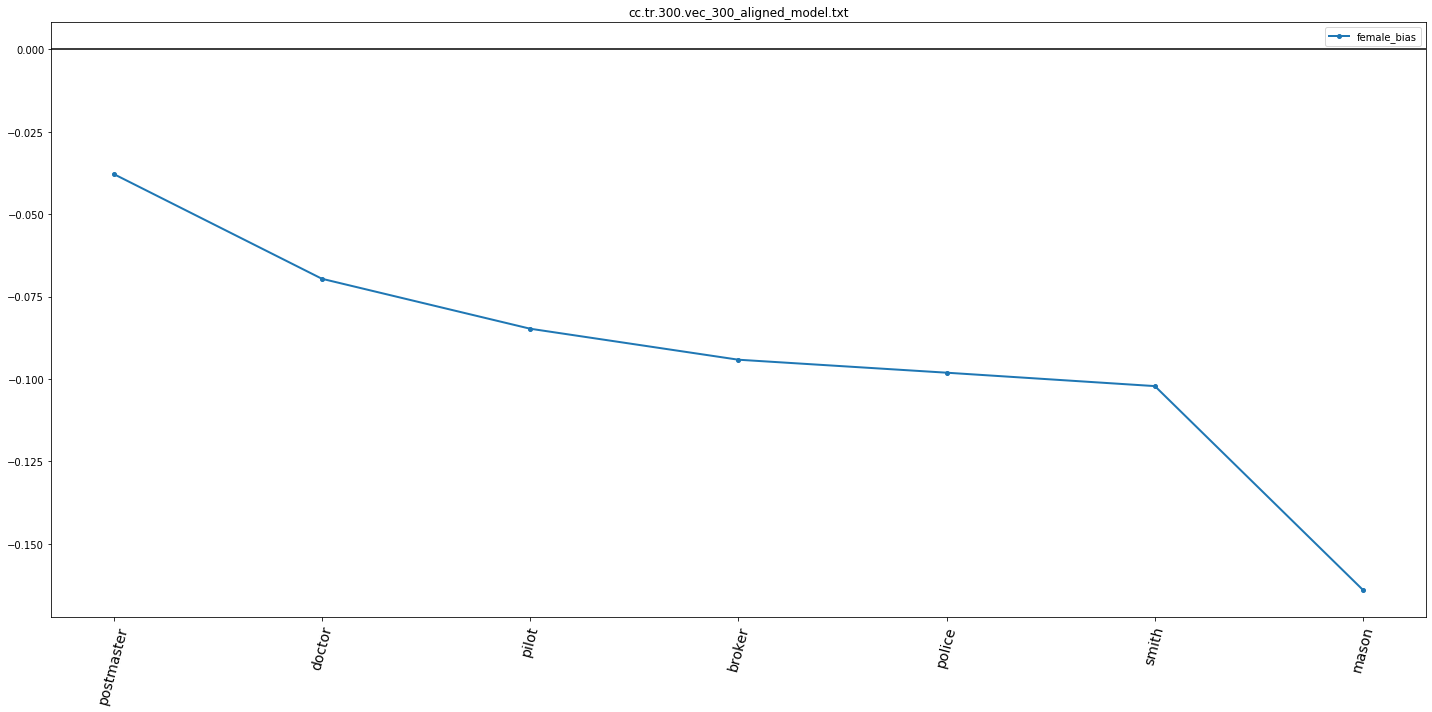

In [4]:
from plot_utils import get_bias_plot
female_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = 'professional_occupation', 
                                                                     reference_labels = ['male', 'female'])

get_bias_plot(bias_dict=female_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = 'female_bias')

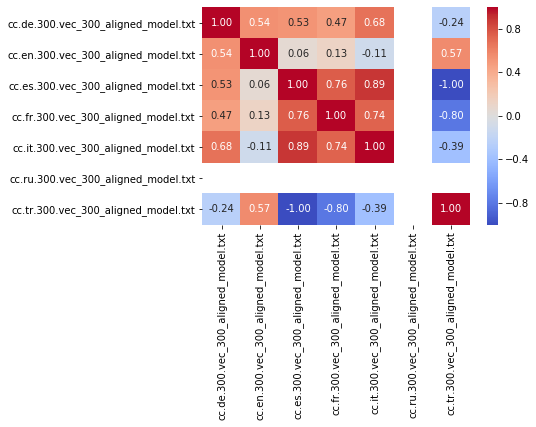

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(female_bias_dict_for_all_embeddings)
get_correlation_heatmap(df=df)


In [7]:
print(df.corr())

                                     cc.de.300.vec_300_aligned_model.txt  \
cc.de.300.vec_300_aligned_model.txt                             1.000000   
cc.en.300.vec_300_aligned_model.txt                             0.542900   
cc.es.300.vec_300_aligned_model.txt                             0.525865   
cc.fr.300.vec_300_aligned_model.txt                             0.472902   
cc.it.300.vec_300_aligned_model.txt                             0.675165   
cc.ru.300.vec_300_aligned_model.txt                                  NaN   
cc.tr.300.vec_300_aligned_model.txt                            -0.242960   

                                     cc.en.300.vec_300_aligned_model.txt  \
cc.de.300.vec_300_aligned_model.txt                             0.542900   
cc.en.300.vec_300_aligned_model.txt                             1.000000   
cc.es.300.vec_300_aligned_model.txt                             0.057150   
cc.fr.300.vec_300_aligned_model.txt                             0.127969   
cc.it.300.v